In [4]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import math

In [5]:
# List of 50 stocks
tickers = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "NVDA", "META", "BRK-B", "JPM", "V",
    "UNH", "JNJ", "XOM", "PG", "HD", "MA", "CVX", "ABBV", "PEP", "LLY",
    "KO", "MRK", "AVGO", "COST", "MCD", "TMO", "DIS", "CSCO", "ACN", "AMD",
    "CMCSA", "ADBE", "NFLX", "PFE", "DHR", "NKE", "TXN", "LIN", "UNP", "INTC",
    "HON", "IBM", "PM", "CAT", "GE", "NOW", "GS", "BLK", "AXP", "DE"
]

# Download historical data for the past 1 month
# Data is a multi-indexed dataframe with ohlc on the first row and the stock ticker on the second row.
data = yf.download(tickers, period="1y", interval="1d")

[**                     4%%                      ]  2 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[*******               14%%                      ]  7 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[***********           22%%                      ]  11 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[*************         28%%                      ]  14 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[******************    38%%                      ]  19 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[********************* 44%%                      ]  22 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************46%%                      ]  23 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************52%%                      ]  26 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************54%%                      ]  27 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************60%%***                   ]  30 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[**********************68%%*******               ]  34 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[**********************78%%***********           ]  39 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[**********************80%%************          ]  40 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************86%%***************       ]  43 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************92%%******************    ]  46 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************96%%********************  ]  48 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[*********************100%%**********************]  50 of 50 completed


/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [6]:
data.head()

Adj Close                                                  \
                  AAPL        ABBV         ACN        ADBE         AMD   
Date                                                                     
2024-02-07  188.486603  168.858871  362.166870  615.849976  170.940002   
2024-02-08  187.401932  168.646606  363.974518  615.859985  169.350006   
2024-02-09  188.169128  167.961548  367.125519  627.210022  172.479996   
2024-02-12  186.475266  166.987076  362.937317  611.840027  171.910004   
2024-02-13  184.372864  167.199326  358.373840  601.890015  171.539993   

                                                                        ...  \
                  AMZN        AVGO         AXP         BLK       BRK-B  ...   
Date                                                                    ...   
2024-02-07  170.529999  124.035324  206.787415  776.165588  397.660004  ...   
2024-02-08  169.839996  125.781807  208.894073  774.700684  397.489990  ...   
2024-02-09  174.449997  126.638268  210.140259  778.617065  398.359985  ...   
2024-02-12  172.339996  124.818779  209.932541  783.061035  397.709991  ...   
2024-02-13  168.639999  123.501526  207.370941  759.923523  394.799988  ...   

              Volume                                                          \
                 PFE       PG       PM      TMO       TSLA      TXN      UNH   
Date                                                                           
2024-02-07  36843000  7209300  4694300  1451400  111535200  4627900  4109100   
2024-02-08  29048400  6121600  9260300  1549300   83034000  3487700  3343000   
2024-02-09  29062700  5978000  4966300  1280800   84476300  3919500  2715400   
2024-02-12  30323700  5482000  4022300  1073000   95498600  3853000  3194000   
2024-02-13  37927500  6046800  5935300  1268000   86759500  5357900  3436000   

                                        
                UNP        V       XOM  
Date                                    
2024-02-07  2337200  4785900  13826800  
2024-02-08  1871500  5833400  19636900  
2024-02-09  2012500  4618300  20410500  
2024-02-12  2259600  3676200  18173100  
2024-02-13  2664100  5493800  18917400  

[5 rows x 300 columns]

In [7]:
# summary statistics of 'data' dataframe
data.describe()

Adj Close                                                              \
             AAPL        ABBV         ACN        ADBE         AMD        AMZN   
count  251.000000  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   211.375586  175.127238  338.576794  508.195975  153.671355  191.811793   
std     26.020680   12.304395   28.123198   46.147916   20.855059   19.164257   
min    164.405121  150.744324  279.392517  405.920013  110.160004  161.020004   
25%    186.159470  165.649307  314.192581  476.845001  139.114998  178.809998   
50%    221.579468  173.180893  343.899994  505.809998  155.080002  186.100006   
75%    229.412598  187.046120  361.180008  546.534973  166.290001  199.644997   
max    259.019989  201.965424  398.250000  627.210022  211.380005  242.059998   

                                                        ...        Volume  \
             AVGO         AXP          BLK       BRK-B  ...           PFE   
count  251.000000  251.000000   251.000000  251.000000  ...  2.510000e+02   
mean   162.651002  254.726342   880.243159  435.564264  ...  3.799346e+07   
std     32.968116   32.523617   106.800382   26.001439  ...  1.579986e+07   
min    119.376144  206.787415   734.400391  394.799988  ...  1.518010e+07   
25%    133.864273  228.902100   783.426941  409.199997  ...  2.854580e+07   
50%    160.709412  245.081879   846.978882  438.470001  ...  3.503000e+07   
75%    174.831566  282.944763   995.659943  458.790009  ...  4.390870e+07   
max    249.331955  325.869995  1075.500000  483.079987  ...  1.310744e+08   

                                                                             \
                 PG            PM           TMO          TSLA           TXN   
count  2.510000e+02  2.510000e+02  2.510000e+02  2.510000e+02  2.510000e+02   
mean   6.583554e+06  5.380032e+06  1.545404e+06  9.120093e+07  5.553361e+06   
std    2.753700e+06  2.256356e+06  6.700946e+05  3.303392e+07  2.337663e+06   
min    2.460800e+06  1.647800e+06  4.887000e+05  3.716760e+07  1.950900e+06   
25%    5.091450e+06  3.954900e+06  1.119400e+06  6.807345e+07  4.140450e+06   
50%    6.046800e+06  4.899800e+06  1.397600e+06  8.354860e+07  5.046100e+06   
75%    7.208700e+06  5.977250e+06  1.805500e+06  1.044846e+08  6.213250e+06   
max    2.864750e+07  1.837440e+07  6.150900e+06  2.438697e+08  1.907880e+07   

                                                               
                UNH           UNP             V           XOM  
count  2.510000e+02  2.510000e+02  2.510000e+02  2.510000e+02  
mean   4.104657e+06  2.385902e+06  6.937576e+06  1.588703e+07  
std    2.477509e+06  8.360163e+05  3.698527e+06  5.391513e+06  
min    1.581900e+06  6.690000e+05  2.684100e+06  7.732900e+06  
25%    2.676200e+06  1.819600e+06  4.836800e+06  1.259525e+07  
50%    3.343000e+06  2.242700e+06  5.969900e+06  1.483570e+07  
75%    4.556550e+06  2.792050e+06  7.985500e+06  1.765065e+07  
max    2.273420e+07  6.802600e+06  2.781090e+07  5.222060e+07  

[8 rows x 300 columns]

In [8]:
# Check for missing values and sort in descending format to capture values faster.
data.isnull().sum().sort_values(ascending=False)

Volume     XOM     0
Adj Close  AAPL    0
           ABBV    0
           ACN     0
           ADBE    0
                  ..
           DHR     0
           DE      0
           CVX     0
           CSCO    0
           COST    0
Length: 300, dtype: int64

In [9]:
''' 
returns stores the percentage returns of each of the assets on a daily basis
Alternatively you can use 
returns = df.loc["adj_close"].pct_change() * 100
'''

returns = ((data["Adj Close"] - data["Adj Close"].shift(1)) / data["Adj Close"].shift(1)) * 100
print(returns)

                AAPL      ABBV       ACN      ADBE       AMD      AMZN  \
Date                                                                     
2024-02-07       NaN       NaN       NaN       NaN       NaN       NaN   
2024-02-08 -0.575463 -0.125706  0.499120  0.001625 -0.930149 -0.404622   
2024-02-09  0.409386 -0.406210  0.865720  1.842957  1.848237  2.714320   
2024-02-12 -0.900181 -0.580176 -1.140809 -2.450534 -0.330469 -1.209516   
2024-02-13 -1.127443  0.127105 -1.257373 -1.626244 -0.215235 -2.146917   
...              ...       ...       ...       ...       ...       ...   
2025-01-31 -0.669219  4.696840  1.103089 -1.917038 -2.448262  1.295599   
2025-02-03 -3.385596  3.393152  0.067536  0.262886 -1.448901 -0.109388   
2025-02-04  2.100789 -0.099928  1.664028  0.371638  4.576882  1.954342   
2025-02-05 -0.141753  0.947619  1.692969 -0.590602 -6.267781 -2.433281   
2025-02-06  0.322622  0.636246 -2.739486 -0.509565 -1.651637  1.126309   

                AVGO       AXP       

In [10]:
log_returns = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
print(log_returns)

                AAPL      ABBV       ACN      ADBE       AMD      AMZN  \
Date                                                                     
2024-02-07       NaN       NaN       NaN       NaN       NaN       NaN   
2024-02-08 -0.005771 -0.001258  0.004979  0.000016 -0.009345 -0.004054   
2024-02-09  0.004085 -0.004070  0.008620  0.018262  0.018314  0.026781   
2024-02-12 -0.009043 -0.005819 -0.011474 -0.024811 -0.003310 -0.012169   
2024-02-13 -0.011338  0.001270 -0.012653 -0.016396 -0.002155 -0.021703   
...              ...       ...       ...       ...       ...       ...   
2025-01-31 -0.006715  0.045899  0.010970 -0.019357 -0.024787  0.012873   
2025-02-03 -0.034442  0.033369  0.000675  0.002625 -0.014595 -0.001094   
2025-02-04  0.020790 -0.001000  0.016503  0.003709  0.044752  0.019355   
2025-02-05 -0.001419  0.009432  0.016788 -0.005924 -0.064728 -0.024634   
2025-02-06  0.003221  0.006342 -0.027777 -0.005109 -0.016654  0.011200   

                AVGO       AXP       

In [11]:
# Select 'AAPL' stock data and extract the 'Close' column
close_prices = data['Close']

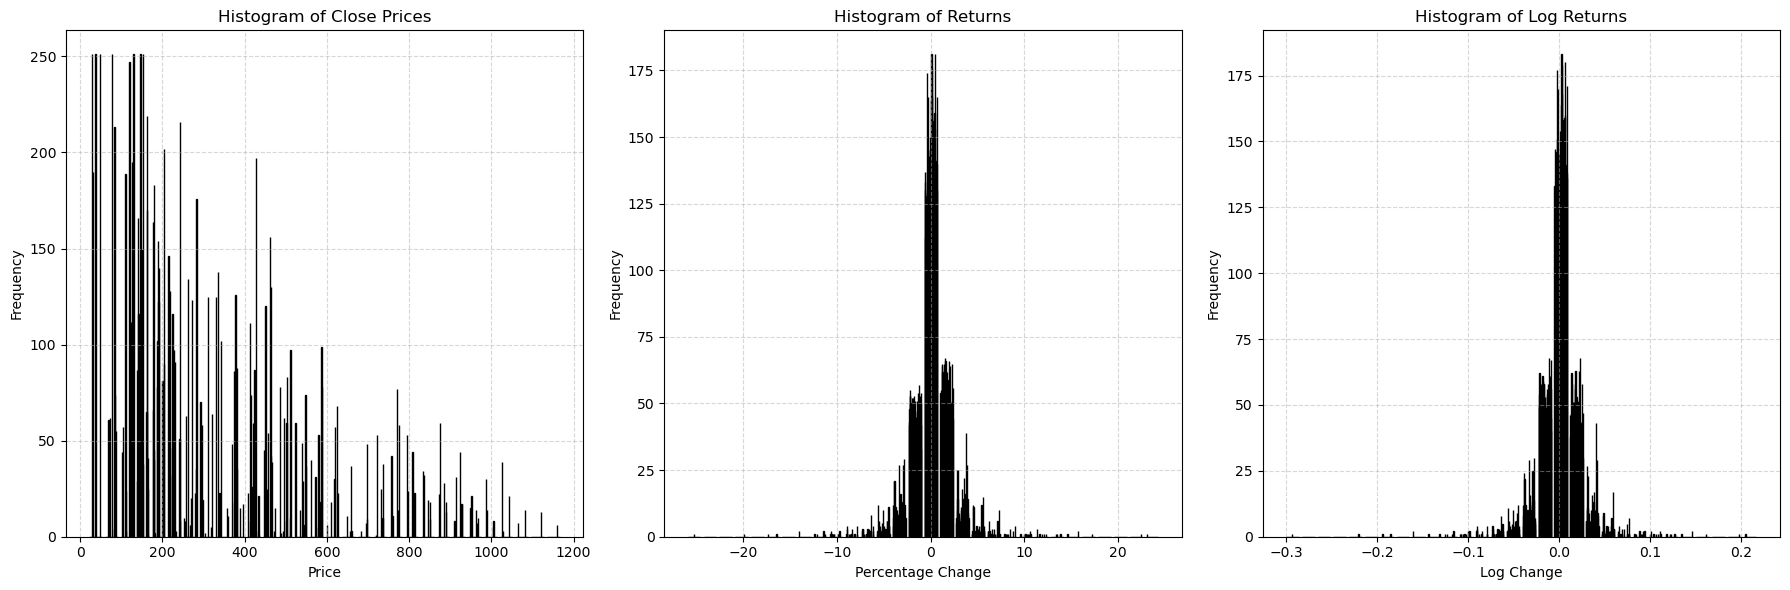

In [12]:
# Create a figure and two subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# First subplot (left side)
axes[0].hist(close_prices, bins=30, edgecolor='black')
axes[0].set_title('Histogram of Close Prices')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, linestyle='--', alpha=0.5)

# Second subplot (right side)
axes[1].hist(returns, bins=30, edgecolor='black')
axes[1].set_title('Histogram of Returns')
axes[1].set_xlabel('Percentage Change')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, linestyle='--', alpha=0.5)

# Third subplot (right side)
axes[2].hist(log_returns, bins=30, edgecolor='black')
axes[2].set_title('Histogram of Log Returns')
axes[2].set_xlabel('Log Change')
axes[2].set_ylabel('Frequency')
axes[2].grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping of labels
plt.show()

The histograms of adjusted closing prices and percentage returns reveal distinct statistical characteristics of the dataset.

1. Adjusted Closing Prices: The histogram exhibits a right-skewed (positively skewed) distribution, indicating that while most stock prices cluster at lower values, a few stocks have significantly higher prices. This skewness suggests a long right tail, which is characteristic of financial data where a few large-cap stocks (e.g., AMZN, BRK-B) have disproportionately high prices compared to smaller-cap stocks.

2. Percentage Returns: The histogram of daily percentage returns appears approximately normally distributed, with most values concentrated around zero. This suggests that stock returns exhibit symmetry, with gains and losses distributed fairly evenly around the mean. This aligns with the fundamental assumption in many financial models, such as the log-normal distribution of prices and the normality of short-term returns under the Efficient Market Hypothesis.

# Statistical Interpretation:
The right-skewness in prices implies that using raw price values in models can lead to misleading conclusions due to the large variation in scale across stocks.
The near-normal distribution of percentage returns suggests that using returns instead of prices provides a stationary and scale-independent measure of stock performance, making it more suitable for statistical modeling and risk analysis.

---

# Creating New Features
- Daily log returns
- Daily risk (standard deviation)

In [13]:
# Assign back to the original dataframe under a new column level
log_returns.columns = pd.MultiIndex.from_product([['Log Returns'], log_returns.columns])  # Add new top-level index

In [14]:
# Merge with the original dataframe
data = data.join(log_returns)

In [15]:
data['Log Returns'].head()

,AAPL,ABBV,ACN,ADBE,AMD,AMZN,AVGO,AXP,BLK,BRK-B,...,PFE,PG,PM,TMO,TSLA,TXN,UNH,UNP,V,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-08,-0.005771,-0.001258,0.004979,0.000016,-0.009345,-0.004054,0.013982,0.010136,-0.001889,-0.000428,...,0.000363,-0.003021,-0.026934,-0.002574,0.010500,0.009029,0.001347,-0.001366,-0.011142,0.016975
2024-02-09,0.004085,-0.004070,0.008620,0.018262,0.018314,0.026781,0.006786,0.005948,0.005043,0.002186,...,-0.000363,-0.007720,0.001235,-0.000254,0.020934,0.013577,-0.003602,0.002529,0.002354,-0.021387
2024-02-12,-0.009043,-0.005819,-0.011474,-0.024811,-0.003310,-0.012169,-0.014472,-0.000989,0.005691,-0.001633,...,0.003622,-0.001971,0.009826,-0.007088,-0.028506,-0.008161,-0.001120,-0.008252,-0.004932,0.013663
2024-02-13,-0.011338,0.001270,-0.012653,-0.016396,-0.002155,-0.021703,-0.010609,-0.012277,-0.029993,-0.007344,...,-0.025262,-0.005361,-0.009041,-0.015220,-0.022089,-0.026611,-0.001527,-0.007262,0.002687,-0.008646


In [16]:
#Calculate the standard deviation of the entire dataset
# std_dev_entire = data['Log Returns'].std().sort_values(ascending=False)
# std_dev_entire.plot(kind='bar', figsize=(12,6))
# plt.title('Population Standard Deviation of Assets')
# plt.xlabel('Assets')
# plt.ylabel('Standard Deviation')
# plt.show()

In [17]:
rolling_std_dev = data['Log Returns'].rolling(window=5).std()
print(rolling_std_dev)

                AAPL      ABBV       ACN      ADBE       AMD      AMZN  \
Date                                                                     
2024-02-07       NaN       NaN       NaN       NaN       NaN       NaN   
2024-02-08       NaN       NaN       NaN       NaN       NaN       NaN   
2024-02-09       NaN       NaN       NaN       NaN       NaN       NaN   
2024-02-12       NaN       NaN       NaN       NaN       NaN       NaN   
2024-02-13       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2025-01-31  0.020759  0.025123  0.014421  0.012436  0.036256  0.010033   
2025-02-03  0.025411  0.024141  0.011239  0.011997  0.021160  0.010153   
2025-02-04  0.020202  0.021523  0.011718  0.011067  0.028862  0.012403   
2025-02-05  0.019686  0.020603  0.006976  0.011271  0.041078  0.017689   
2025-02-06  0.020044  0.019885  0.018626  0.009230  0.039185  0.017401   

                AVGO       AXP       

In [18]:
# Assign back to the original dataframe under a new column level
rolling_std_dev.columns = pd.MultiIndex.from_product([['Daily Risk'], rolling_std_dev.columns])  # Add new top-level index

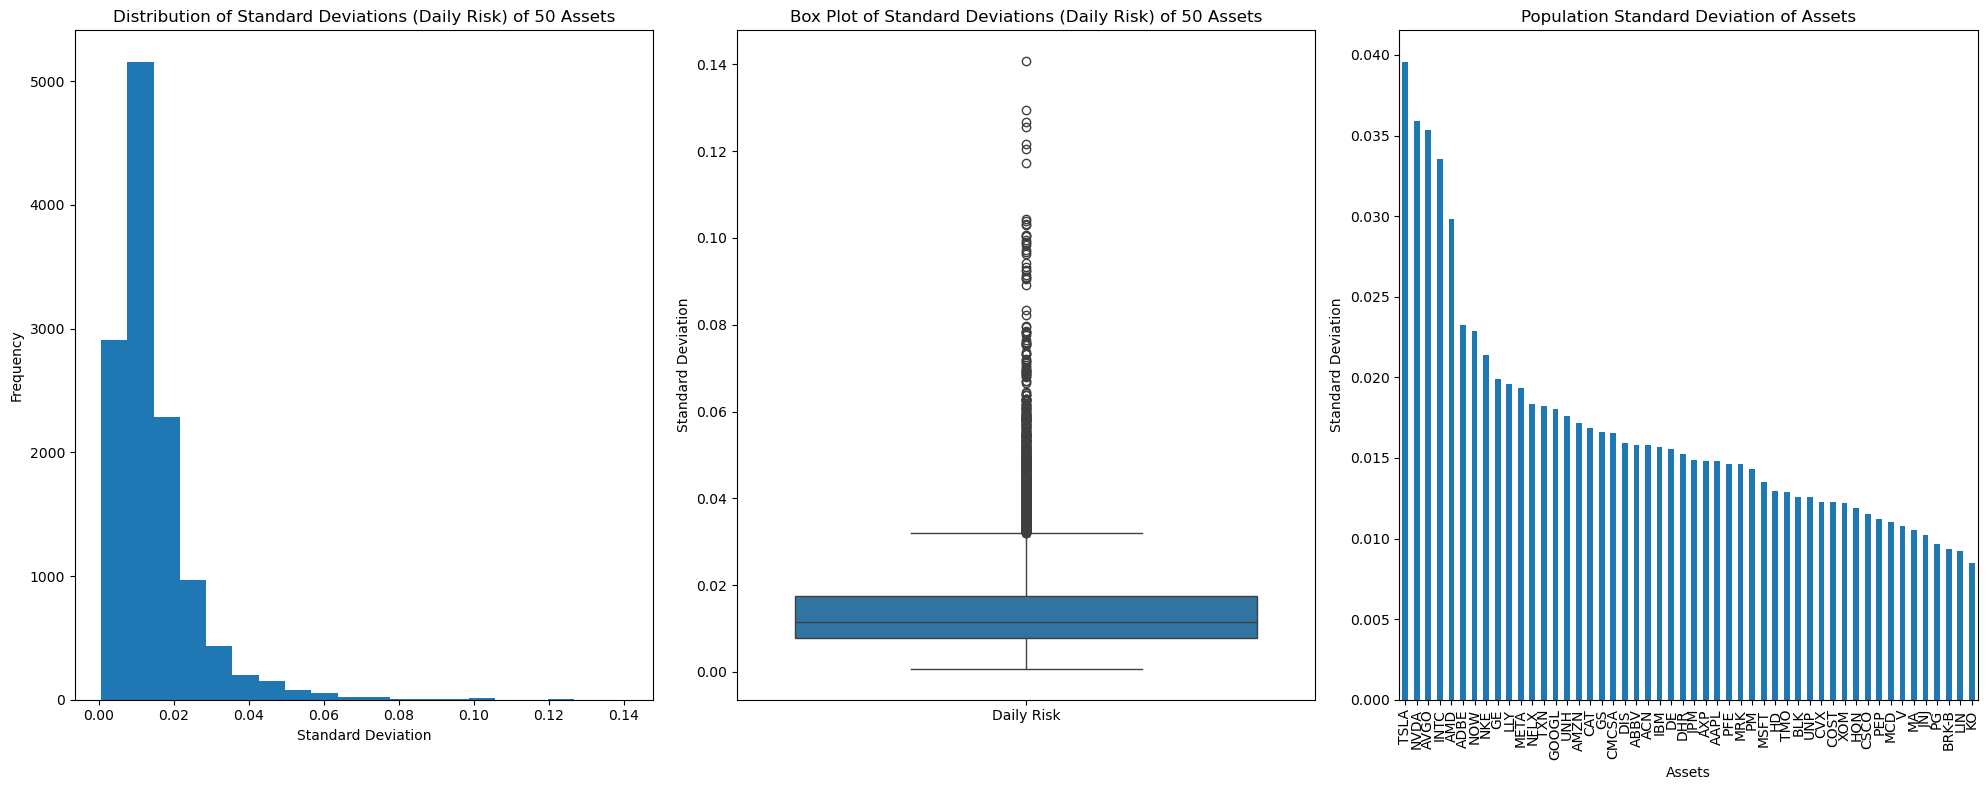

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
std_dev_entire = data['Log Returns'].std().sort_values(ascending=False)

axes[0].hist(rolling_std_dev.values.flatten(), bins=20)
axes[0].set_title('Distribution of Standard Deviations (Daily Risk) of 50 Assets')
axes[0].set_xlabel('Standard Deviation')
axes[0].set_ylabel('Frequency')

sns.boxplot(rolling_std_dev, ax=axes[1])
axes[1].set_title('Box Plot of Standard Deviations (Daily Risk) of 50 Assets')
axes[1].set_ylabel('Standard Deviation')

std_dev_entire.plot(kind='bar', ax=axes[2])
axes[2].set_title('Population Standard Deviation of Assets')
axes[2].set_xlabel('Assets')
axes[2].set_ylabel('Standard Deviation')

plt.tight_layout()
plt.show()

# Intuition
1. Most assets have low daily risk (standard deviation): The majority of the assets have relatively small variations in price, and thus their standard deviations are lower.

2. A few assets have high daily risk (standard deviation): There are some assets with much higher volatility, but these are fewer in number. These assets' returns deviate much more from their mean, which shows up as the right tail of the histogram.

The skewness in volatility should be accounted for during random portfolio generation. If randomly sampled from assets without considering skewness, you might create portfolios that are riskier than expected.
Give lower-risk assets a higher probability of selection, Instead of equal probability, adjust selection based on risk—low-volatility assets get chosen more often.

In [20]:
# Merge with the original dataframe
data = data.join(rolling_std_dev)

In [21]:
data['Daily Risk'].head(10)

,AAPL,ABBV,ACN,ADBE,AMD,AMZN,AVGO,AXP,BLK,BRK-B,...,PFE,PG,PM,TMO,TSLA,TXN,UNH,UNP,V,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-14,0.005894,0.004837,0.014656,0.017115,0.020714,0.019630,0.012559,0.008789,0.015978,0.006243,...,0.012492,0.002226,0.014005,0.012191,0.024875,0.016402,0.001866,0.010675,0.007014,0.016029
2024-02-15,0.006119,0.007519,0.014582,0.019039,0.021068,0.019838,0.010395,0.008258,0.017980,0.007971,...,0.014932,0.006436,0.006840,0.012200,0.036710,0.018146,0.004295,0.010611,0.006270,0.019571
2024-02-16,0.003850,0.006730,0.014254,0.030118,0.022725,0.013180,0.010736,0.007829,0.018013,0.008079,...,0.015063,0.005862,0.007663,0.012196,0.036648,0.016640,0.003699,0.013046,0.008434,0.015197
2024-02-20,0.003842,0.008252,0.015620,0.031311,0.032087,0.013492,0.010908,0.007812,0.017966,0.007558,...,0.014961,0.006284,0.005962,0.011722,0.037367,0.017781,0.003670,0.012689,0.010292,0.015672


In [22]:
data['Log Returns'].head(10)

,AAPL,ABBV,ACN,ADBE,AMD,AMZN,AVGO,AXP,BLK,BRK-B,...,PFE,PG,PM,TMO,TSLA,TXN,UNH,UNP,V,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-08,-0.005771,-0.001258,0.004979,0.000016,-0.009345,-0.004054,0.013982,0.010136,-0.001889,-0.000428,...,0.000363,-0.003021,-0.026934,-0.002574,0.010500,0.009029,0.001347,-0.001366,-0.011142,0.016975
2024-02-09,0.004085,-0.004070,0.008620,0.018262,0.018314,0.026781,0.006786,0.005948,0.005043,0.002186,...,-0.000363,-0.007720,0.001235,-0.000254,0.020934,0.013577,-0.003602,0.002529,0.002354,-0.021387
2024-02-12,-0.009043,-0.005819,-0.011474,-0.024811,-0.003310,-0.012169,-0.014472,-0.000989,0.005691,-0.001633,...,0.003622,-0.001971,0.009826,-0.007088,-0.028506,-0.008161,-0.001120,-0.008252,-0.004932,0.013663
2024-02-13,-0.011338,0.001270,-0.012653,-0.016396,-0.002155,-0.021703,-0.010609,-0.012277,-0.029993,-0.007344,...,-0.025262,-0.005361,-0.009041,-0.015220,-0.022089,-0.026611,-0.001527,-0.007262,0.002687,-0.008646
2024-02-14,-0.004821,0.006500,0.022269,0.004592,0.040892,0.013780,0.008409,0.005849,0.009377,0.009780,...,0.005178,-0.004104,0.000336,0.017795,0.025167,0.006482,0.000174,0.018156,0.006325,-0.004946
2024-02-15,-0.001576,0.012364,0.001428,-0.023798,-0.010916,-0.006925,0.002256,0.007699,0.015978,0.011894,...,0.014647,0.008828,-0.002694,0.000547,0.060353,0.017830,0.007593,0.001758,0.012246,0.028256
2024-02-16,-0.008466,0.005084,-0.005479,-0.077041,-0.016485,-0.001709,-0.015607,0.000141,-0.005088,0.006276,...,0.003991,0.003180,0.007502,-0.001332,-0.002498,-0.002055,0.001285,-0.015931,-0.008650,0.000000
2024-02-20,-0.004122,-0.009852,-0.017832,-0.008727,-0.048189,-0.014439,-0.015316,-0.000329,0.005163,0.002853,...,-0.001087,0.006329,-0.000112,0.000547,-0.031447,0.014608,-0.000940,0.002228,-0.012317,-0.009493


In [23]:
data.isnull().sum().sort_values(ascending=False)

Daily Risk  DIS      5
            DHR      5
            DE       5
            CVX      5
            CSCO     5
                    ..
High        COST     0
            CMCSA    0
            CAT      0
            BRK-B    0
            BLK      0
Length: 400, dtype: int64

---

# Cleaning Data and Preprocessing
- Its ideal to drop the missing values generated by the log returns and daily risk columns since using other methods like backward fill uses future data to estimate past values.(bfill may be useful when filling timestamps).
- Forward fill can be used but in this case the missing data is at the startof the dataset and not at the very end hence it can't work in this case.
- In this case the best approach may be to drop the missing values using dropna() ensuring all calculations start on a level playing field.

In [24]:
# Drop rows with missing data
data = data.dropna()

In [25]:
data.isnull().sum().sort_values(ascending=False)

Daily Risk  MRK     0
            META    0
            MCD     0
            MA      0
            LLY     0
                   ..
Adj Close   AMD     0
            ADBE    0
            ACN     0
            ABBV    0
            AAPL    0
Length: 400, dtype: int64

In [26]:
data.describe()

Adj Close                                                              \
             AAPL        ABBV         ACN        ADBE         AMD        AMZN   
count  246.000000  246.000000  246.000000  246.000000  246.000000  246.000000   
mean   211.871408  175.273510  338.082103  506.034714  153.314187  192.231545   
std     26.047219   12.385396   28.187886   44.003364   20.913063   19.125861   
min    164.405121  150.744324  279.392517  405.920013  110.160004  161.020004   
25%    186.009804  165.301147  313.550537  476.307503  138.862495  179.245003   
50%    222.195541  173.439499  341.591568  504.540009  154.529999  186.270004   
75%    229.769707  187.119129  360.792870  542.927521  165.647503  199.947498   
max    259.019989  201.965424  398.250000  604.659973  211.380005  242.059998   

                                                        ...  Daily Risk  \
             AVGO         AXP          BLK       BRK-B  ...         PFE   
count  246.000000  246.000000   246.000000  246.000000  ...  246.000000   
mean   163.417178  255.663361   882.392540  436.343944  ...    0.013469   
std     32.855179   32.172669   106.794166   25.674886  ...    0.006074   
min    119.376144  208.577591   734.400391  396.730011  ...    0.002719   
25%    135.241322  229.661057   786.493546  409.677498  ...    0.009371   
50%    161.575775  246.599319   852.271149  439.869995  ...    0.012492   
75%    175.395058  284.877701   995.838852  459.039993  ...    0.016670   
max    249.331955  325.869995  1075.500000  483.079987  ...    0.035066   

                                                                               \
               PG          PM         TMO        TSLA         TXN         UNH   
count  246.000000  246.000000  246.000000  246.000000  246.000000  246.000000   
mean     0.008497    0.010674    0.011213    0.035553    0.017101    0.014539   
std      0.004935    0.007597    0.005855    0.017543    0.008049    0.009587   
min      0.002063    0.002052    0.002581    0.004350    0.003161    0.001866   
25%      0.005202    0.006380    0.007007    0.023830    0.011068    0.008111   
50%      0.007181    0.008891    0.010438    0.032445    0.015361    0.011424   
75%      0.010822    0.012605    0.013110    0.043155    0.021390    0.019458   
max      0.032454    0.048569    0.038211    0.094121    0.043069    0.044453   

                                           
              UNP           V         XOM  
count  246.000000  246.000000  246.000000  
mean     0.011248    0.009618    0.011208  
std      0.005729    0.004891    0.004739  
min      0.002730    0.002522    0.001564  
25%      0.007336    0.006522    0.007603  
50%      0.010405    0.008447    0.010625  
75%      0.013826    0.010559    0.014826  
max      0.033318    0.029542    0.022706  

[8 rows x 400 columns]

In [34]:
data.columns.get_level_values(0).unique()

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Log Returns',
       'Daily Risk'],
      dtype='object')

In [24]:
data.shape

(246, 400)

---
# Generate random Weights

In [30]:
n_assets = 50  # Number of assets
n_portfolios = 1000  # Number of random portfolios

# Initialize an empty array to store portfolio weights
random_portfolios = np.zeros((n_portfolios, n_assets))

random_portfolios.shape

(1000, 50)

In [33]:
for i in range(n_portfolios):
    weights = np.random.rand(n_assets)  # Generate random values
    # Normalize to sum to 1, This divides each element by the sum of all elements, it is the shorthand for weights = weights / np.sum(weights)
    weights /= np.sum(weights)  
    # copies the weights array into the i-th row of random_portfolios.
    random_portfolios[i] = weights  

# Check if all portfolios sum to 1
print(random_portfolios[:5], np.sum(random_portfolios, axis=1)[:5])  # Show first 5 portfolios

[[0.02027715 0.01163183 0.02628066 0.01278552 0.03453755 0.00601124
  0.0354613  0.01301782 0.02492374 0.00059339 0.00359226 0.0202805
  0.02322284 0.02807839 0.02394847 0.02908588 0.00353464 0.03352612
  0.02625887 0.0133428  0.01797745 0.02780375 0.02195035 0.02027478
  0.01004218 0.01912276 0.03560655 0.0268961  0.02415798 0.01320655
  0.02841257 0.02804475 0.01754414 0.0053381  0.01853327 0.01336581
  0.03573078 0.02492249 0.01500942 0.03154907 0.01084005 0.02220087
  0.01985253 0.02272941 0.00467798 0.0270597  0.00893057 0.02679552
  0.00016907 0.03086447]
 [0.0226108  0.02044704 0.02019912 0.03249001 0.00784145 0.02431836
  0.02861292 0.02363257 0.00989663 0.02744139 0.03414498 0.02523911
  0.02542344 0.03077422 0.00632413 0.00262892 0.02230542 0.02951755
  0.02072043 0.01440121 0.00827605 0.03218142 0.02938064 0.0278486
  0.01186871 0.00943476 0.03439977 0.02635603 0.01177645 0.02670745
  0.01231015 0.01476227 0.01045719 0.0160842  0.00769096 0.01363982
  0.01280002 0.01497782 0

---
# Simulate Portfolio Performance
1. Calculate expected returns. 
    - $E(R_p)=\sum_{i=1}^{n} w_i .E(R_i)$
    - where $E(R_i) = \frac{\sum_{i=1}^{n}\text{Log Returns}}{n}$
2. Calculate expected risk(volatility).
3. Calculate corelation.

In [43]:
# Calculate expected returns of individual assets
expected_returns = data['Log Returns'].mean()
expected_returns.shape

(50,)

- random_portfolios is a (1000 × num_assets) matrix, where each row is a different portfolio’s weights.
- expected_returns is a (num_assets × 1) column vector of asset expected returns.
- The @ operator performs matrix multiplication, resulting in a (1000 × 1) array, where each row is the expected return of a portfolio.

In [42]:
portfolio_expected_returns = random_portfolios @ expected_returns
portfolio_expected_returns.shape

(1000,)